In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [5]:
df = pd.read_csv('ratings.csv')
df = df.drop('number of years after 1970 ', 1)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['timestamp'].dt.strftime("%Y,%b,%d")
df['month_year'] = df['timestamp'].dt.to_period('M')

In [6]:
df = df.sort_values(by=['month_year'],ascending = False)

In [7]:
df.head(3)

,userId,movieId,rating,timestamp,timestamp.1,date,month_year
679426,4642,176101,3.5,2019-11-15 08:49:43,1573807783,"2019,Nov,15",2019-11
753131,5114,207405,3.0,2019-11-17 18:45:16,1574016316,"2019,Nov,17",2019-11
246442,1746,110771,4.0,2019-11-18 11:20:56,1574076056,"2019,Nov,18",2019-11


In [8]:
df.drop(df[df['movieId'] != 2858].index, inplace=True)

In [9]:
df.sort_values(by=['timestamp'],inplace=True,ascending=False)

In [10]:
df.head(3)

,userId,movieId,rating,timestamp,timestamp.1,date,month_year
876462,5889,2858,4.0,2019-11-06 06:17:14,1573021034,"2019,Nov,06",2019-11
137276,973,2858,4.0,2019-11-01 16:53:49,1572627229,"2019,Nov,01",2019-11
973256,6542,2858,5.0,2019-10-31 19:16:28,1572549388,"2019,Oct,31",2019-10


In [11]:
df = df.sort_values(by=['month_year'],ascending=False)

In [12]:
df.dtypes

userId                  int64
movieId                 int64
rating                float64
timestamp      datetime64[ns]
timestamp.1             int64
date                   object
month_year          period[M]
dtype: object

In [13]:
a = df['timestamp'].min()
print(a)
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df.head(3)

1999-09-29 18:51:32


,userId,movieId,rating,timestamp,timestamp.1,date,month_year,year,month
876462,5889,2858,4.0,2019-11-06 06:17:14,1573021034,"2019,Nov,06",2019-11,2019,11
137276,973,2858,4.0,2019-11-01 16:53:49,1572627229,"2019,Nov,01",2019-11,2019,11
973256,6542,2858,5.0,2019-10-31 19:16:28,1572549388,"2019,Oct,31",2019-10,2019,10


In [14]:
#iterating over time 
start = df['timestamp'].min()
end = df['timestamp'].max()
df2 = pd.DataFrame(columns=['timestamp','number_of_ratings'])
delta = datetime.timedelta(days=14)
i = 0
print(start)
print(end)
while start <= end:
    count = 0
    for t in df.timestamp:
        if start<=t<start+delta:
            count +=1
    #print(start)
    #print(count)
    #print(i)
    df2.loc[i] = [start,count]
    i+=1
    start+= delta
   
    


1999-09-29 18:51:32
2019-11-06 06:17:14


In [15]:
df2.head(4)

,timestamp,number_of_ratings
0,1999-09-29 18:51:32,34
1,1999-10-13 18:51:32,25
2,1999-10-27 18:51:32,15
3,1999-11-10 18:51:32,16


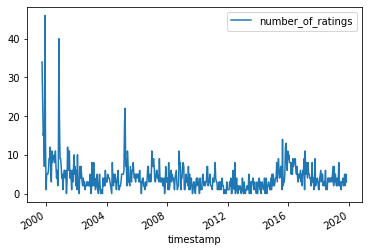

In [23]:
df2.plot(x='timestamp',y='number_of_ratings',kind='line')
plt.savefig('test.png')

In [ ]:
plt.show()

In [ ]:
df2.dtypes